In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dynasaur.plugins.data_visualization_controller import DataVisualizationController
from dynasaur.plugins.criteria_controller import CriteriaController


In [2]:
#Auxilaries - where are your definition files located?
input_dir = os.path.join(os.getcwd(),"Auxilaries")
path_to_def = os.path.join(input_dir, "Calculation_procedures.def")
path_to_def_id = os.path.join(input_dir, "Objects.def")

#Simulation Results - which simulation do you want to analyse?
path_to_data = os.path.join(os.getcwd())
outputfiles = os.path.join(path_to_data,"binout*")

data_vis_controller = DataVisualizationController(calculation_procedure_def_file=path_to_def,
                                                  object_def_file=path_to_def_id,
                                                  data_source=outputfiles)

#Output Directory - where should resuls from analysis be stored?
output_dir = os.path.join(path_to_data,"Output")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

[READ DYNASAUR DEF]	read C:\FE_Simulations\materials\01\Auxilaries\Calculation_procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\FE_Simulations\materials\01\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read secforc data ...
[READ BINOUT]	done reading secforc!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress solid
[READ BINOUT]	assign stresses for solid elements
[READ BINOUT]	extract data took : 0.10501670837402344
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 0.001001596450805664
[READ BINOUT]	assign strains for solid elements
[READ BINOUT]	elout: initialize strain solid
[READ BINOUT]	extract data took : 0.10502457618713379
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 0.0
[READ BINOUT]	done reading elout!


In [3]:
commands = [
            {'visualization': 'CUBE_Force_Crosssection', 'x_label': 'Time [ms]', 'y_label': 'Force [kN]'},
            {'visualization': "CUBE_Area_Crosssection", 'x_label': 'Time[ms]', 'y_label': 'Area [mm^2]'},
            {'visualization': "CUBE_Disp_z", 'x_label': 'Time[ms]', 'y_label': 'Displacement [mm]'},
            {'visualization': "MODEL_Timestep", 'x_label': 'Time[ms]', 'y_label': 'timestep [ms]'},
#            {'visualization': "MODEL_Internal_Energy", 'x_label': 'Time[ms]', 'y_label': 'internal energy []'},
#            {'visualization': "MODEL_Hourglass_Energy", 'x_label': 'Time[ms]', 'y_label': 'hourglass energy []'},
#            {'visualization': "MODEL_Total_Energy", 'x_label': 'Time[ms]', 'y_label': 'total energy []'},
            {'visualization': "CUBE_Strain", 'x_label': 'Time[ms]', 'y_label': 'Strain []'},
            {'visualization': "CUBE_Stress", 'x_label': 'Time[ms]', 'y_label': 'Stress [GPa]'}]
for command in commands:
    data_vis_controller.calculate(command)
    

[CALCULATION]	Calculating Visualization: CUBE_Force_Crosssection
[DATA]	read id 1 from channel name: z_force
[CALCULATION]	Calculating Visualization: CUBE_Area_Crosssection
[DATA]	read id 1 from channel name: area
[CALCULATION]	Calculating Visualization: CUBE_Disp_z
[DATA]	read id 6 from channel name: z_displacement
[CALCULATION]	Calculating Visualization: MODEL_Timestep
[DATA]	ENERGY_GLOBAL read from channel name: time_step
[CALCULATION]	Calculating Visualization: CUBE_Strain
[CALCULATION]	Calculating Visualization: CUBE_Stress


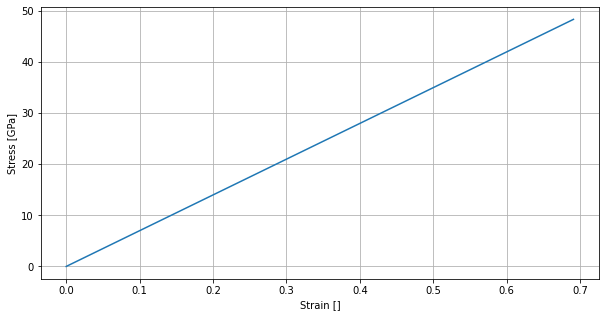

In [5]:
strain_elout = data_vis_controller.get_data('CUBE', 'Strain')['Y']
x_label = data_vis_controller.get_data('CUBE', 'Strain')['y_name']

stress_elout = data_vis_controller.get_data('CUBE', 'Stress')['Y']
y_label = data_vis_controller.get_data('CUBE', 'Stress')['y_name']

plt.figure(figsize=(10,5))
plt.plot(strain_elout, stress_elout)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

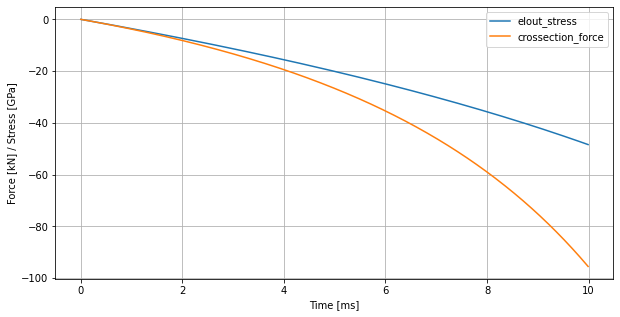

In [6]:
time = data_vis_controller.get_data('CUBE', 'Force_Crosssection')['X']
x_label = data_vis_controller.get_data('CUBE', 'Force_Crosssection')['x_name']

force = data_vis_controller.get_data('CUBE', 'Force_Crosssection')['Y']
y_label = data_vis_controller.get_data('CUBE', 'Force_Crosssection')['y_name']

plt.figure(figsize=(10,5))
plt.plot(time, -stress_elout)
plt.plot(time, force)
plt.legend(["elout_stress","crossection_force"])
plt.xlabel(x_label)
plt.ylabel("Force [kN] / Stress [GPa]")
plt.grid()
plt.show()

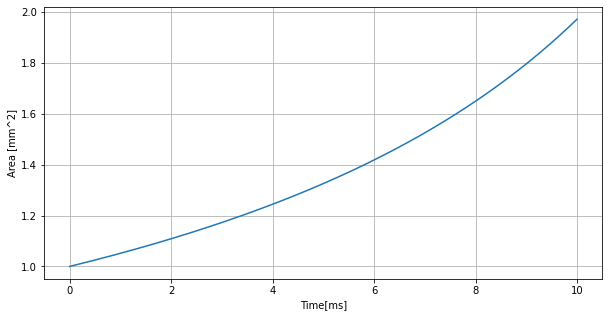

In [7]:
time = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['X']
x_label = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['x_name']

area = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['Y']
y_label = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['y_name']

plt.figure(figsize=(10,5))
plt.plot(time, area)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

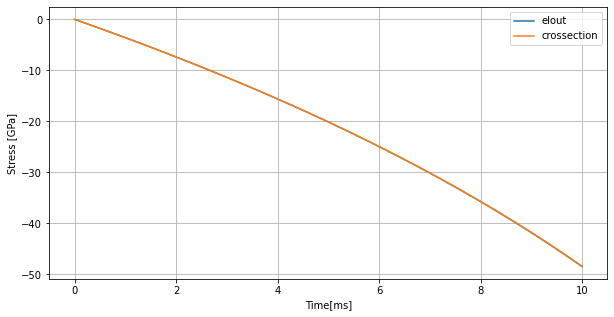

In [8]:
time = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['X']
x_label = data_vis_controller.get_data('CUBE', 'Area_Crosssection')['x_name']

stress = force/area
y_label = "Stress [GPa]"

plt.figure(figsize=(10,5))
plt.plot(time, stress)
plt.plot(time, -stress_elout)
plt.legend(["elout","crossection"])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

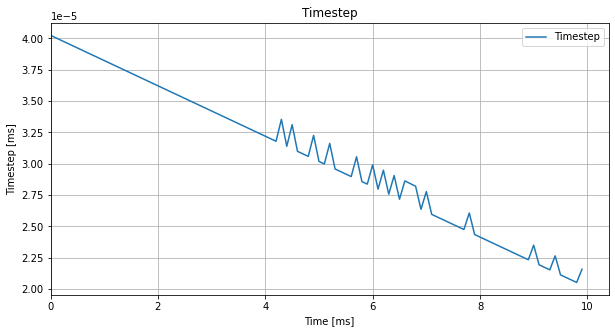

In [9]:
time = data_vis_controller.get_data("MODEL","Timestep")["X"]
Timestep = data_vis_controller.get_data("MODEL","Timestep")["Y"]


fig5, ax = plt.subplots(figsize=(10,5))# a figure with a single Axes
ax.plot(time, Timestep, label="Timestep")


ax.set(xlabel='Time [ms]',ylabel='Timestep [ms]', title='Timestep', xlim=0)
ax.grid()
ax.legend()
plt.show()

In [10]:
crit_controller = CriteriaController(calculation_procedure_def_file=path_to_def, 
                                     object_def_file=path_to_def_id,
                                     data_source=outputfiles)

commands = [{'criteria': 'CUBE_Cube_Stress_Max'}]
           

for command in commands:
    crit_controller.calculate(command)

d = crit_controller.get_data()
print(d)

[READ DYNASAUR DEF]	read C:\FE_Simulations\materials\01\Auxilaries\Calculation_procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\FE_Simulations\materials\01\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read elout data ...
[READ BINOUT]	elout: initialize stress solid
[READ BINOUT]	assign stresses for solid elements
[READ BINOUT]	extract data took : 0.10103750228881836
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 0.0009927749633789062
[READ BINOUT]	assign strains for solid elements
[READ BINOUT]	elout: initialize strain solid
[READ BINOUT]	extract data took : 0.10303664207458496
[READ BINOUT]	calc eigenvalue
[READ BINOUT]	calc eigenvalues took : 0.0
[READ BINOUT]	done reading elout!
[CALCULATION]	Calculating Criteria: CUBE_Cube_Stress_Max
{'CUBE': {'injury': {'Cube_Stress_Max': {'Value': array([48.37894058])}}}}


In [11]:
#writes data from data_vis_controller to csv
data_vis_controller.write_CSV(output_dir)


[CALCULATION]	DATA VISUALIZATION writing csv to C:\FE_Simulations\materials\01\Output
[CALCULATION]	DATA VISUALIZATION done writing csv to C:\FE_Simulations\materials\01\Output\DATA VISUALIZATION_2021-01-17-22-56-19.csv
